<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Simple Linear Regression


Estimated time needed: **15** minutes
    

## Objectives

After completing this lab you will be able to:

* Use scikit-learn to implement simple Linear Regression
* Create a model, train it, test it and use the model


### Importing Needed packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot , init_notebook_mode
import cufflinks
init_notebook_mode(True)
cufflinks.go_offline(True)

### Downloading Data
To download the data, we will use !wget to download it from IBM Object Storage.


In [3]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2024-03-14 05:18:18--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.002s  

2024-03-14 05:18:18 (42.7 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In case you're working **locally** uncomment the below line. 


In [2]:
!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv -o FuelConsumptionCo2.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 72629  100 72629    0     0  12865      0  0:00:05  0:00:05 --:--:-- 19730


__Did you know?__ When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)



## Understanding the Data

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data in


In [3]:
df = pd.read_csv('FuelConsumptionCo2.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 108.5+ KB


In [22]:
df['CO2EMISSIONS'] = df['CO2EMISSIONS'].astype(float)

In [12]:
def data_overview(df):
    print("Rows :  " , df.shape[0])
    print("Columns:  " , df.shape[1] )
    print('Missing Value number : ' , df.isnull().sum().values.sum()) #isnull.sum()會對每條series做sum up ，所以我們還要取出value做一次sum up .
    print('\nUnique values' , df.nunique())
data_overview(df)

Rows :   1067
Columns:   13
Missing Value number :  0

Unique values MODELYEAR                     1
MAKE                         39
MODEL                       663
VEHICLECLASS                 16
ENGINESIZE                   45
CYLINDERS                     7
TRANSMISSION                 22
FUELTYPE                      4
FUELCONSUMPTION_CITY        167
FUELCONSUMPTION_HWY         118
FUELCONSUMPTION_COMB        148
FUELCONSUMPTION_COMB_MPG     43
CO2EMISSIONS                159
dtype: int64


### Data Exploration
Let's first have a descriptive exploration on our data.


In [13]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Let's select some features to explore more.


In [63]:
def bar_ichart(df, cat_feature, num_feature):
    df_grp = df.groupby(cat_feature)[num_feature].median().reset_index()
    df_grp = df_grp.sort_values(by=num_feature, ascending=False)
    custom_colors = ['#1f77b4','#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    df_grp.iplot(kind='bar', x=cat_feature, y=num_feature, 
              title='Median of '+ num_feature +' by '+cat_feature, 
              xTitle=cat_feature, 
              yTitle=num_feature,
              colors=custom_colors)
    
feature = ['FUELTYPE', 'MAKE', 'VEHICLECLASS', 'MODEL']
for i in feature:
    bar_ichart(df, i, 'CO2EMISSIONS')

Vehicle class vs fuel type

<Figure size 720x432 with 0 Axes>

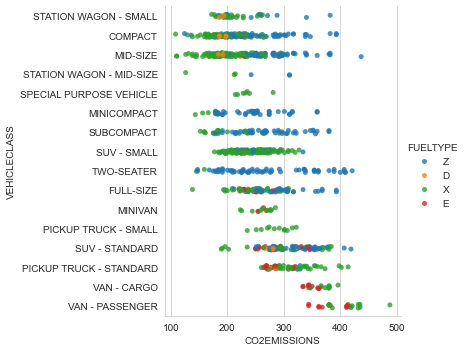

In [189]:
plt.figure(figsize=(10, 6))
# Calculate the median CO2 emissions for each VEHICLECLASS and sort in descending order
medians = df.groupby('VEHICLECLASS')['CO2EMISSIONS'].median().sort_values(ascending=False)

# Convert VEHICLECLASS to a categorical type with categories sorted by the median CO2 emissions
df['VEHICLECLASS'] = pd.Categorical(df['VEHICLECLASS'], categories=medians.index, ordered=True)

# Create the catplot with sorted VEHICLECLASS
g = sns.catplot(x='CO2EMISSIONS', y='VEHICLECLASS', hue='FUELTYPE', data=df, alpha=0.8, height=5, aspect=1.2)
plt.show()


In [142]:
grouped_df = df.pivot(columns = 'FUELTYPE' , values ='CO2EMISSIONS')

grouped_df.iplot(kind = 'hist')

/var/folders/1c/w8qh2r6x0q7_sb813g8j8rvh0000gn/T/ipykernel_3086/4017807447.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




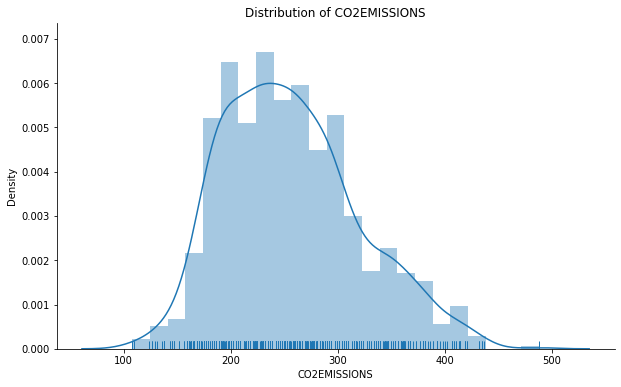

In [83]:
plt.figure(figsize=(10,6))
plt.ticklabel_format(style='plain', axis=('x'))
sns.distplot(df['CO2EMISSIONS'].dropna(), rug = True)
plt.title('Distribution of CO2EMISSIONS')
sns.despine()

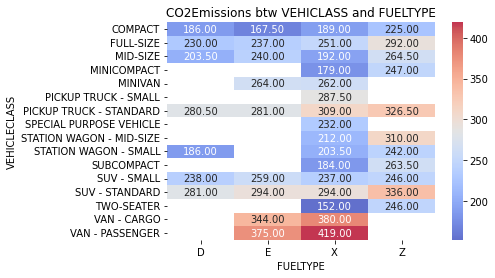

In [7]:

group_df = df.groupby(['VEHICLECLASS', 'FUELTYPE'])['CO2EMISSIONS'].aggregate('median').reset_index()
group_df = group_df.pivot(index= 'VEHICLECLASS', columns= 'FUELTYPE', values= 'CO2EMISSIONS')

sns.heatmap(group_df,cmap='coolwarm', alpha = 0.8, annot=True, fmt = '.2f')
plt.title('CO2Emissions btw VEHICLASS and FUELTYPE')
plt.show()

<Axes: >

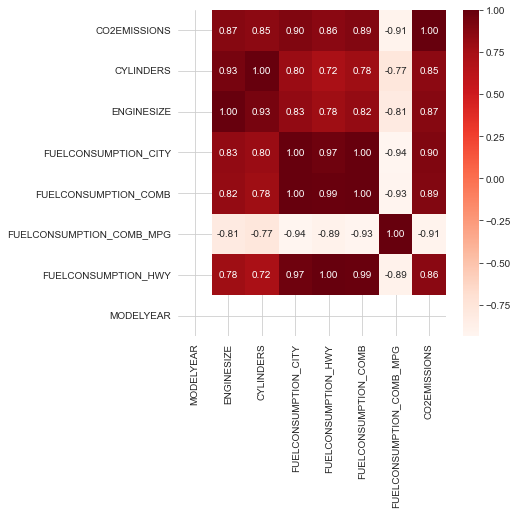

In [186]:
corr = df.select_dtypes('number').dropna().corr().sort_index()
plt.figure(figsize = (6,6))
sns.heatmap(corr, cbar = True, annot = True, fmt = '.2f', cmap = 'Reds')

<Axes: >

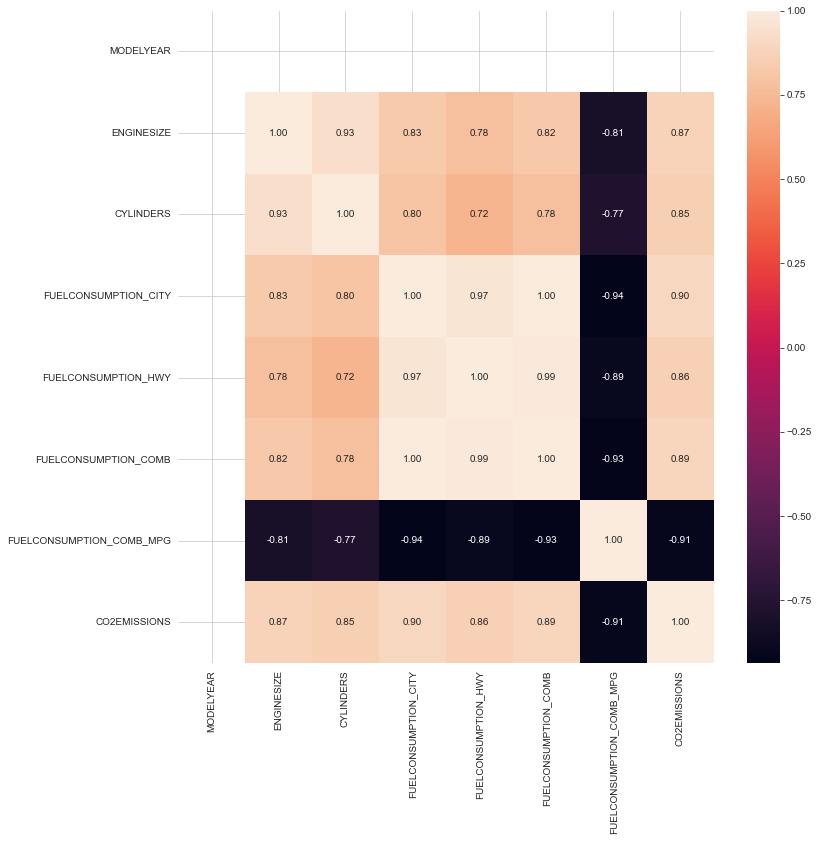

In [184]:
continual_var = df.select_dtypes(np.number).columns

no_null_col = df[continual_var].isnull().sum() ==0
no_null_col = no_null_col[no_null_col == True].index.tolist()

corr = df[no_null_col].dropna().corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr, cbar = True, annot = True, fmt = '.2f')

Modeling

In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


We can plot each of these features:


Now, let's plot each of these features against the Emission, to see how linear their relationship is:


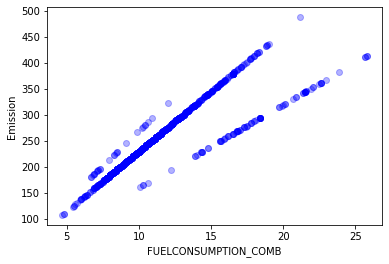

In [7]:
plt.scatter(cdf['FUELCONSUMPTION_COMB'], cdf['CO2EMISSIONS'], color='blue', alpha = 0.3)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

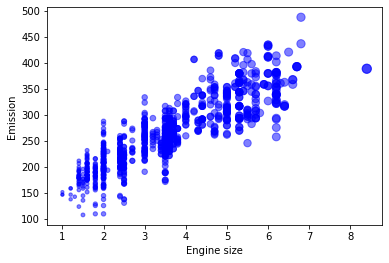

In [116]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue', alpha=0.5, s = df.ENGINESIZE*10 )
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Practice
Plot __CYLINDER__ vs the Emission, to see how linear is their relationship is:


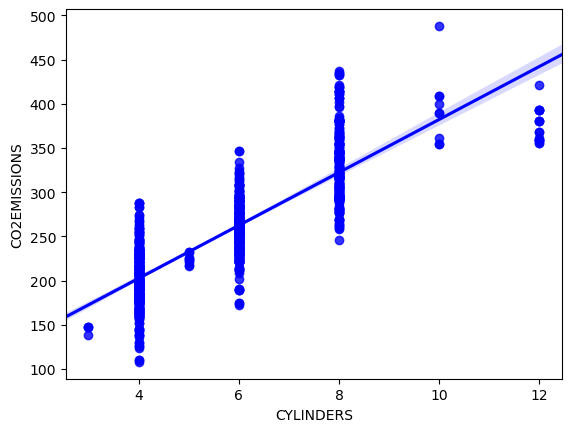

In [34]:
# write your code here
sns.regplot(cdf['CYLINDERS'], cdf['CO2EMISSIONS'], color = 'blue')
plt.show()

<details><summary>Click here for the solution</summary>

```python    
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

```

</details>


#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 


In [157]:
from sklearn.preprocessing import StandardScaler
x = df[['ENGINESIZE']].values
y = df['CO2EMISSIONS'].values

In [158]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

### Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation. 


#### Train data distribution


In [173]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(x_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [174]:
from sklearn.metrics import r2_score
y_hat = pipe.predict(x_test)
# Compute the accuracy score using the pipeline's score method
accuracy = pipe.score(x_test, y_test)
print("Accuracy using pipe.score: {:.2f}".format(accuracy))

r2 = r2_score(y_test, y_hat)
print("R2 Score: {:.2f}".format(r2))

Accuracy using pipe.score: 0.76
R2 Score: 0.76


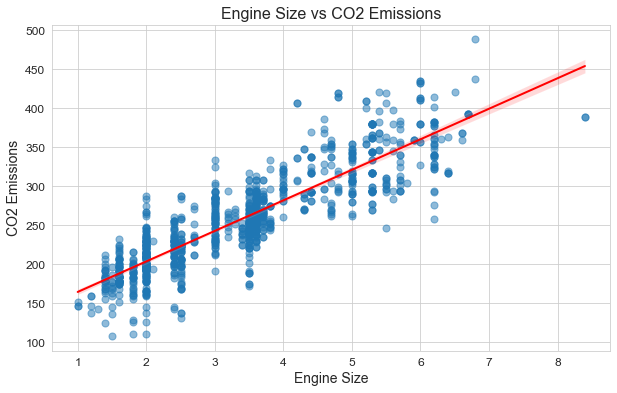

In [182]:
plt.figure(figsize=(10, 6))

# Create the regression plot
sns.regplot(x='ENGINESIZE', y='CO2EMISSIONS', data=df, 
            scatter_kws={'s': 50, 'alpha': 0.5},  # Scatter plot settings
            line_kws={'color': 'red', 'lw': 2})   # Line plot settings

# Add titles and labels
plt.title('Engine Size vs CO2 Emissions', fontsize=16)
plt.xlabel('Engine Size', fontsize=14)
plt.ylabel('CO2 Emissions', fontsize=14)

# Improve plot aesthetics
sns.set_style("whitegrid")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

* Root Mean Squared Error (RMSE). 

* R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [75]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = lm.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_))

Mean absolute error: 23.70
Residual sum of squares (MSE): 1042.21
R2-score: 0.76


## Exercise


Lets see what the evaluation metrics are if we trained a regression model using the `FUELCONSUMPTION_COMB` feature.

Start by selecting `FUELCONSUMPTION_COMB` as the train_x data from the `train` dataframe, then select `FUELCONSUMPTION_COMB` as the test_x data from the `test` dataframe


In [13]:
train_x = train[['FUELCONSUMPTION_COMB']]
test_x = test[['FUELCONSUMPTION_COMB']]

train_y = train[['CO2EMISSIONS']]
test_y = test[['CO2EMISSIONS']]
train_x

,FUELCONSUMPTION_COMB
1,9.6
2,5.9
3,11.1
4,10.6
5,10.0
...,...
1059,10.2
1063,11.5
1064,11.8
1065,11.3


<details><summary>Click here for the solution</summary>

```python    
train_x = train[["FUELCONSUMPTION_COMB"]]

test_x = test[["FUELCONSUMPTION_COMB"]]

```

</details>


Now train a Linear Regression Model using the `train_x` you created and the `train_y` created previously


In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(train_x, train_y)
print('coefficients:', lm.coef_, 'Intercept:', lm.intercept_)

coefficients: [[16.19844179]] Intercept: [68.72141255]


<details><summary>Click here for the solution</summary>

```python    
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)

```

</details>


Find the predictions using the model's `predict` function and the `test_x` data


In [22]:
y_hat = lm.predict(test_x)


<details><summary>Click here for the solution</summary>

```python    
predictions = regr.predict(test_x)

```

</details>


Finally use the `predictions` and the `test_y` data and find the Mean Absolute Error value using the `np.absolute` and `np.mean` function like done previously


In [25]:
#ADD CODE
MAE = np.mean(np.absolute(y_hat - test_y))
print('MAE: %.2f'% MAE)

MAE: 21.36


<details><summary>Click here for the solution</summary>

```python    
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))

```

</details>


We can see that the MAE is much worse when we train using `ENGINESIZE` than `FUELCONSUMPTION_COMB`


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">Watson Studio</a>



### Thank you for completing this lab!


## Author

Saeed Aghabozorgi


### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>

Azim Hirjani


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-11-03 | 2.1  | Lakshmi Holla  |  Changed URL of the csv |
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab |
|   |   |   |   |
|   |   |   |   |


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
